In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
%matplotlib inline

# Preprocessing #1 Flow :

* 데이터 파악 -> Train 데이터 + Test 데이터 -> Missing Value 채우기 -> Age Segmentation -> LabelEncoding, OneHotEncoding, MinMaxScaling

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Pclass 종류에 따른 성별과 Survived의 관계
* 높은 class 일수록 생존확률이 높아진다
* 여성이 남성보다 살 확률이 높다.

In [14]:
# 그래프에 한글 제목 달기 위해 설정
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

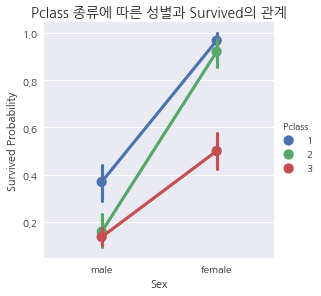

In [15]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=train_df)
plt.title(u'Pclass 종류에 따른 성별과 Survived의 관계', size=14)
plt.ylabel('Survived Probability')
plt.show()

### Embarked 종류에 따른 성별과 Survived의 관계
* 여성이 남성보다 살 확률이 높다.
* 남성의 경우 C > S > Q 순으로 생존률이 높고 여성의 경우 C > Q > S 순으로 생존률이 높다.

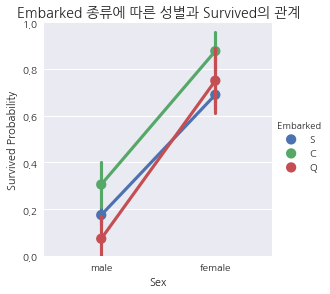

In [16]:
sns.factorplot(x='Sex', y='Survived', hue='Embarked', data=train_df)
plt.title(u'Embarked 종류에 따른 성별과 Survived의 관계', size=14)
plt.ylabel('Survived Probability')
plt.ylim([0, 1])
plt.show()

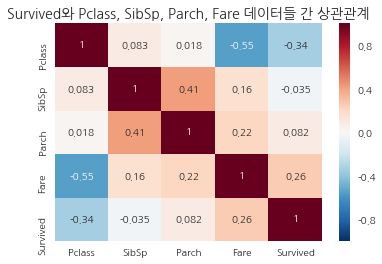

In [17]:
sns.heatmap(train_df[['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(),annot=True)
plt.title(u'Survived와 Pclass, SibSp, Parch, Fare 데이터들 간 상관관계', size=14)
plt.show()

* 서로 연관되어 있는 독립변수들을 같이 사용하면 정보의 가치가 떨어짐 
  * Pclass와 Fare 간 상관관계가 있음 -> Pclass 선택, Fare 제거
  * SibSp, Parch 간 상관관계가 있음 -> Parch 선택, SibSp 제거

### Train data + Test data
  * Train data + Test data

In [18]:
Big_df = pd.concat([train_df, test_df], axis=0)
Big_df_copy = Big_df.copy()

### 제거 할 Feature : Ticket, Name, PassengerId, Cabin, Fare, Sibsp, ***Survived***
* PassengerId는 분석에 사용되지 않음
* Cabin(선실 번호), Name, Ticket은 Survived에 영향을 끼치지 않는다고 판단하여 제거
* *Survived* : Target 변수

In [19]:
Big_df_copy = Big_df_copy.drop(["Name", "PassengerId", "Cabin", "Ticket","Fare", "SibSp", "Survived"], axis=1)
Big_df_copy.index = range(len(Big_df_copy))
Big_df_copy.head()

,Age,Embarked,Parch,Pclass,Sex
0,22.0,S,0,3,male
1,38.0,C,0,1,female
2,26.0,S,0,3,female
3,35.0,S,0,1,female
4,35.0,S,0,3,male


In [20]:
Big_df_copy.isnull().sum()

Age         263
Embarked      2
Parch         0
Pclass        0
Sex           0
dtype: int64

# Missing Value 채우기
* Age

In [21]:
print(train_df.loc[np.where(train_df['Age'].isnull())]['Survived'].value_counts())
print(train_df.loc[np.where(train_df['Age'].isnull())]['Survived'].value_counts(normalize=True))

0    125
1     52
Name: Survived, dtype: int64
0    0.706215
1    0.293785
Name: Survived, dtype: float64


In [22]:
print(train_df.loc[np.where(train_df['Age'].isnull())]['Sex'].value_counts())
print(train_df.loc[np.where(train_df['Age'].isnull())]['Sex'].value_counts(normalize=True))

male      124
female     53
Name: Sex, dtype: int64
male      0.700565
female    0.299435
Name: Sex, dtype: float64


In [23]:
# male
print(train_df[(train_df['Age'].isnull()) & (train_df['Sex'] == 'male')]['Survived'].value_counts())
print(train_df[(train_df['Age'].isnull()) & (train_df['Sex'] == 'male')]['Survived'].value_counts(normalize=True))

# female
print(train_df[(train_df['Age'].isnull()) & (train_df['Sex'] == 'female')]['Survived'].value_counts())
print(train_df[(train_df['Age'].isnull()) & (train_df['Sex'] == 'female')]['Survived'].value_counts(normalize=True))

0    108
1     16
Name: Survived, dtype: int64
0    0.870968
1    0.129032
Name: Survived, dtype: float64
1    36
0    17
Name: Survived, dtype: int64
1    0.679245
0    0.320755
Name: Survived, dtype: float64


In [24]:
train_df.groupby(train_df.Sex)['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [25]:
# male
print(train_df[(train_df['Age'] > 27)  & (train_df['Age'] < 31)  &(train_df['Sex'] == 'male')]['Survived'].value_counts())
print(train_df[(train_df['Age'] > 27)  & (train_df['Age'] < 31)  &(train_df['Sex'] == 'male')]['Survived'].value_counts(normalize=True))

# female
print(train_df[(train_df['Age'] > 24)  & (train_df['Age'] < 30)  &(train_df['Sex'] == 'female')]['Survived'].value_counts())
print(train_df[(train_df['Age'] > 24)  & (train_df['Age'] < 30)  &(train_df['Sex'] == 'female')]['Survived'].value_counts(normalize=True))

0    42
1     6
Name: Survived, dtype: int64
0    0.875
1    0.125
Name: Survived, dtype: float64
1    20
0    10
Name: Survived, dtype: int64
1    0.666667
0    0.333333
Name: Survived, dtype: float64


In [26]:
Big_df_copy.groupby(Big_df_copy.Sex)['Age'].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [27]:
Big_df_copy.loc[:, 'Age'].fillna(Big_df_copy.groupby(Big_df_copy.Sex)['Age'].transform('median'), inplace=True)

In [28]:
Big_df_copy.head()

,Age,Embarked,Parch,Pclass,Sex
0,22.0,S,0,3,male
1,38.0,C,0,1,female
2,26.0,S,0,3,female
3,35.0,S,0,1,female
4,35.0,S,0,3,male


In [29]:
Big_df_copy.isnull().sum()

Age         0
Embarked    2
Parch       0
Pclass      0
Sex         0
dtype: int64

* Embarked : S로 NaN값 채움

In [30]:
Big_df_copy.loc[np.where(Big_df_copy['Embarked'].isnull())]

,Age,Embarked,Parch,Pclass,Sex
61,38.0,NaN,0,1,female
829,62.0,NaN,0,1,female


In [31]:
Big_df_copy['Embarked'].fillna('S', inplace=True)

In [32]:
Big_df_copy.isnull().sum()

Age         0
Embarked    0
Parch       0
Pclass      0
Sex         0
dtype: int64

### Age 구간별로 나누기 => Category 데이터로 변환 (Age_Segmentation)

* 0세 초과 ~ 13세 이하  : children
* 13세 초과 ~ 19세 이하 : teenage
* 19세 초과 ~ 64세 이하 : adult
* 64세 초과 ~           : senior

In [33]:
bins = [0, 13, 19, 64, 100]
labels = ['children', 'teenage', 'adult', 'senior']
divide_age_section = pd.cut(Big_df_copy['Age'], bins=bins, labels=labels)
Big_df_copy['Age_Segmentation'] = divide_age_section

In [34]:
Big_df_copy2 = Big_df_copy.drop(['Age'], axis=1)
Big_df_copy2.head()

,Embarked,Parch,Pclass,Sex,Age_Segmentation
0,S,0,3,male,adult
1,C,0,1,female,adult
2,S,0,3,female,adult
3,S,0,1,female,adult
4,S,0,3,male,adult


In [35]:
Big_df_copy2['Age_Segmentation'].value_counts()

adult       1071
teenage      126
children      99
senior        13
Name: Age_Segmentation, dtype: int64

### LabelEncoding
* Using Feature : Sex, Embarked, Age_Segmentation

In [36]:
def using_label_encoder(df,lst):
    le = LabelEncoder()
    for _, column in enumerate(lst):
        df[column] = le.fit_transform(df[column])
    
    return df
      
using_le_column = ['Embarked', 'Age_Segmentation', 'Sex']
Big_df_copy2_le = using_label_encoder(Big_df_copy2, using_le_column)
Big_df_copy2_le.head()

,Embarked,Parch,Pclass,Sex,Age_Segmentation
0,2,0,3,1,0
1,0,0,1,0,0
2,2,0,3,0,0
3,2,0,1,0,0
4,2,0,3,1,0


### OneHotEncoding

* Using Feature : (Embarked, Age_Segmentation) : LabelEncoding 처리 후, Pclass

---

* DataFrame['Embarked'].as_matrix()의 경우 1차원 numpy array 형태

* Scikit-Learn에서 OneHotEncoder()는 한차원 높은 2차원 array로 변환시켜줘야 함

 -> OneHotEncoder().fit_transform(DataFrame['Embarked'].as_matrix().reshape(-1, 1)).toarray()  or
 
    OneHotEncoder().fit_transform(DataFrame['Embarked'].as_matrix()[:, np.newaxis]).toarray()
    
 -> .toarray()를 해주면 Sparse Matrix의 형태를 볼 수 있음

In [37]:
ohe = OneHotEncoder()
ohe_embarked = pd.DataFrame(ohe.fit_transform(Big_df_copy2_le['Embarked'].as_matrix().reshape(-1, 1)).toarray(), 
                    columns=['Embarked_C', 'Embarked_S', 'Embarked_Q'], index=Big_df_copy2_le.index)

ohe_pclass = pd.DataFrame(ohe.fit_transform(Big_df_copy2_le['Pclass'].as_matrix().reshape(-1, 1)).toarray(),
                    columns=['First_Class', 'Second Class', 'Third Class'], index=Big_df_copy2_le.index)

ohe_age_segmentation = pd.DataFrame(ohe.fit_transform(Big_df_copy2_le['Age_Segmentation'].as_matrix().reshape(-1, 1)).toarray(),
                    columns=['Age_adult', 'Age_children', 'Age_senior', 'Age_teenage'], index=Big_df_copy2_le.index)

ohe_sex = pd.DataFrame(ohe.fit_transform(Big_df_copy2_le['Sex'].as_matrix().reshape(-1, 1)).toarray(),
                    columns=['Male', 'Female'], index=Big_df_copy2_le.index)

Big_df_concat = pd.concat([Big_df_copy2_le, ohe_embarked, ohe_pclass, ohe_age_segmentation, ohe_sex], axis=1)
Big_df_concat_mms = MinMaxScaler(feature_range=(0, 5)).fit_transform(Big_df_concat)
Big_df_final = pd.DataFrame(Big_df_concat_mms, columns=Big_df_concat.columns, index=Big_df_concat.index)
Big_df_final = Big_df_final.drop(['Age_Segmentation', 'Embarked', 'Pclass', 'Sex'], axis=1)
Big_df_final.head()

,Parch,Embarked_C,Embarked_S,Embarked_Q,First_Class,Second Class,Third Class,Age_adult,Age_children,Age_senior,Age_teenage,Male,Female
0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0
1,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
2,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0
3,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0


In [38]:
# Pickle 파일로 저장
Big_df_final.to_pickle('save_preprocessing_1.pkl')

# Preprocessing #2 Flow :
* Age 나누는 기준 다르게
    * 20살보다 적으면 nonadult
    * 20살보다 많으면 adult
* Missing Value 채우기 -> Pandas get_dummies -> MinMaxScaler

* Age, Embarked Missing Value 채우기

In [47]:
Big_df_pre2 = Big_df.drop(["Name", "PassengerId", "Cabin", "Ticket","Fare", "SibSp", "Survived"], axis=1)
Big_df_pre2.index = range(len(Big_df))
Big_df_pre2.head()

,Age,Embarked,Parch,Pclass,Sex
0,22.0,S,0,3,male
1,38.0,C,0,1,female
2,26.0,S,0,3,female
3,35.0,S,0,1,female
4,35.0,S,0,3,male


In [48]:
Big_df_pre2.loc[:, 'Age'].fillna(Big_df_pre2.groupby(Big_df_pre2.Sex)['Age'].transform('median'), inplace=True)
Big_df_pre2['Embarked'].fillna('S', inplace=True)

In [41]:
bins = [0, 19, 100]
labels = ['student', 'adult']
divide_age_section = pd.cut(Big_df_pre2['Age'], bins=bins, labels=labels)
Big_df_pre2['Age_Segmentation'] = divide_age_section

In [42]:
Big_df_pre2 = Big_df_pre2.drop(['Age'], axis=1)
Big_df_pre2.head()

,Embarked,Parch,Pclass,Sex,Age_Segmentation
0,S,0,3,male,adult
1,C,0,1,female,adult
2,S,0,3,female,adult
3,S,0,1,female,adult
4,S,0,3,male,adult


In [43]:
Big_df_pre2['Pclass'] = Big_df_pre2['Pclass'].astype('object')

In [44]:
Big_df_pre2.head()

,Embarked,Parch,Pclass,Sex,Age_Segmentation
0,S,0,3,male,adult
1,C,0,1,female,adult
2,S,0,3,female,adult
3,S,0,1,female,adult
4,S,0,3,male,adult


In [45]:
Big_df_pre2 = pd.get_dummies(Big_df_pre2)
Big_df_pre2_mms = MinMaxScaler(feature_range=(0, 5)).fit_transform(Big_df_pre2)
Big_pre2_df = pd.DataFrame(Big_df_pre2_mms, columns=Big_df_pre2.columns, index=Big_df_pre2.index)
Big_pre2_df.head()

,Parch,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Segmentation_student,Age_Segmentation_adult
0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0
1,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
2,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0
3,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0
4,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0


In [46]:
#Pickle 파일로 저장
Big_pre2_df.to_pickle('save_preprocessing_2.pkl')